### Dataset
Dataset link : https://www.kaggle.com/mirichoi0218/insurance

### Data Pre-processing 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.shape

(1338, 7)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [8]:
# Let's check the categorical variables
df.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [9]:
# Let's check the numerical variables
df.select_dtypes(include=['int64', 'float64']).columns

Index(['age', 'bmi', 'children', 'charges'], dtype='object')

Group the datasets

In [10]:
# Group by sex
df.groupby('sex').mean()

,age,bmi,children,charges
sex,,,,
female,39.503021,30.377749,1.074018,12569.578844
male,38.917160,30.943129,1.115385,13956.751178


In [11]:
# Group by smoker
df.groupby('smoker').mean() # A huge variation in premium

,age,bmi,children,charges
smoker,,,,
no,39.385338,30.651795,1.090226,8434.268298
yes,38.514599,30.708449,1.113139,32050.231832


In [12]:
# Group by region
df.groupby('region').mean()

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


In [15]:
df.isnull().values.any() # No missing values in this dataset

False

In [16]:
df.isnull().values.sum()

0

#### Encoding categorical data 

In [17]:
df.select_dtypes(include='object').columns

Index(['sex', 'smoker', 'region'], dtype='object')

In [18]:
# Let's check unique values
df['sex'].unique()

array(['female', 'male'], dtype=object)

In [19]:
df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [20]:
df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [21]:
# One hot encoding
pd.get_dummies(data=df, drop_first=True)

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,1,0,1,0,0
1334,18,31.920,0,2205.98080,0,0,0,0,0
1335,18,36.850,0,1629.83350,0,0,0,1,0
1336,21,25.800,0,2007.94500,0,0,0,0,1


In [22]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [23]:
df = pd.get_dummies(data=df, drop_first=True)

In [24]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [26]:
df.shape

(1338, 9)

In [28]:
# Drop the charges column
dataset = df.drop(columns='charges')

In [29]:
dataset.head()

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


### Data Visualization 

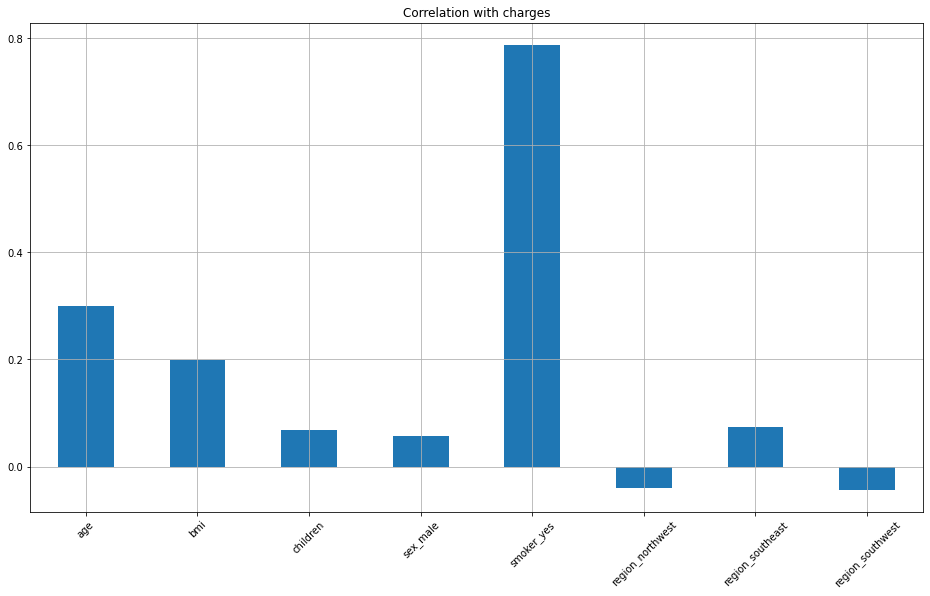

In [30]:
# Check correlation matrix
dataset.corrwith(df['charges']).plot.bar(figsize=(16,9), title='Correlation with charges', rot=45, grid=True)

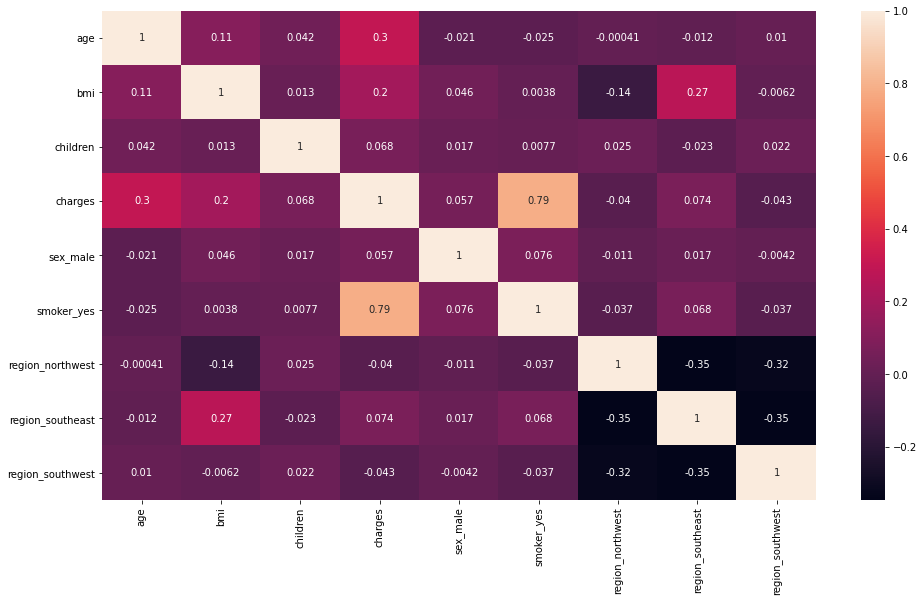

In [31]:
# Heatmap
corr = df.corr()
plt.figure(figsize=(16,9))
sns.heatmap(corr, annot=True)

#### Splitting dataset 

In [32]:
x = df.drop(columns='charges')

In [33]:
y = df['charges']

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [37]:
x_train.shape

(1070, 8)

In [38]:
y_train.shape

(1070,)

In [39]:
x_test.shape

(268, 8)

In [40]:
y_test.shape

(268,)

#### Feature Scaling 

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [44]:
x_train

array([[-0.14853305,  0.54530479,  2.41394802, ..., -0.55791981,
        -0.6155209 ,  1.70862925],
       [-1.49780784,  0.59867181, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.14273553,  0.96092064,  0.76087642, ..., -0.55791981,
        -0.6155209 , -0.58526447],
       ...,
       [ 0.06451033, -0.91339361, -0.89219519, ..., -0.55791981,
         1.6246402 , -0.58526447],
       [-1.42679338,  0.77656186, -0.89219519, ...,  1.79237229,
        -0.6155209 , -0.58526447],
       [-0.4325909 , -1.97749955, -0.06565939, ..., -0.55791981,
        -0.6155209 ,  1.70862925]])

In [45]:
x_test

array([[ 0.88804863, -0.03584905, -0.1324111 , ..., -0.60033831,
        -0.59458839,  2.03809866],
       [ 0.5279926 , -0.18082248, -0.1324111 , ..., -0.60033831,
         1.68183573, -0.49065338],
       [ 0.60000381,  1.77457214,  0.71249783, ...,  1.66572743,
        -0.59458839, -0.49065338],
       ...,
       [ 1.24810465,  1.72479211, -0.97732004, ..., -0.60033831,
        -0.59458839, -0.49065338],
       [-0.69619788,  1.50995197,  1.55740677, ..., -0.60033831,
         1.68183573, -0.49065338],
       [ 0.4559814 , -0.97992301,  1.55740677, ..., -0.60033831,
        -0.59458839, -0.49065338]])

### Building the Model 

#### Linear Regression 

In [46]:
from sklearn.linear_model import LinearRegression

In [47]:
lr = LinearRegression()

In [48]:
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [49]:
# Predict the model
y_pred = lr.predict(x_test)

In [50]:
from sklearn.metrics import r2_score

In [51]:
# R square
r2_score(y_test, y_pred)

0.7997338990335742

#### Random Forest Regressor 

In [52]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
rf = RandomForestRegressor()

In [54]:
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [55]:
y_pred = rf.predict(x_test)

In [56]:
# R-square
r2_score(y_test, y_pred)

0.8723890111712008

### Predict Premium for an Instance

In [62]:
df.head()

,age,bmi,children,charges,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,0,1,0,0,1
1,18,33.770,1,1725.55230,1,0,0,1,0
2,28,33.000,3,4449.46200,1,0,0,1,0
3,33,22.705,0,21984.47061,1,0,1,0,0
4,32,28.880,0,3866.85520,1,0,1,0,0


In [63]:
# Name : Mr X, age : 40, sex : 1, bmi : 32, children : 2, smoker : 1, region : northeast
pred_mrx = [[40, 32, 2, 1, 1, 0, 0, 0]]

In [64]:
rf.predict(sc.transform(pred_mrx))

array([39379.5089115])

In [65]:
# One more example
pred_mry = [[20, 23, 0, 0, 0, 1, 0, 0]]
rf.predict(sc.transform(pred_mry))

array([2076.3319555])

### Save the model 

In [66]:
import pickle

In [67]:
saved_model = pickle.dumps(rf)

In [68]:
# Load the pickled model
rf_pickle = pickle.loads(saved_model)
  
# Use the loaded pickled model to make predictions
rf_pickle.predict(sc.transform(pred_mry))

array([2076.3319555])

In [70]:
pickle.dump(rf, open('rf_model.sav', 'wb'))

In [72]:
# Load the model from disk
loaded_model = pickle.load(open('rf_model.sav', 'rb'))
result = loaded_model.score(x_test, y_test)
print(result)

0.8723890111712007


In [73]:
loaded_model.predict(sc.transform(pred_mry))

array([2076.3319555])